In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
df=pd.read_csv('diabetes.csv')

1. Size atanan veri setine tüm algoritmalar için optimizasyon uygulayınız.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

*Pregnancies* ve *Outcome* dışında diğer özniteliklerin 0 değerlerinin olması mantıklı değil bu yüzden bunları NaN olarak değiştirildi

In [ ]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction','Age']]=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [ ]:
df.fillna(df.mean(), inplace=True)   #eksik değerler o sütunun ortalaması ile doldurulur.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


Veri setine, Standart normalizasyon uygulandı.

In [ ]:
# Standart normalizasyon
scaler = StandardScaler()

# Normalizasyon işlemi uygulanacak özellikleri seçme
columns_to_normalize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Normalizasyon işlemi
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


2.Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Naive bayes sınıflandırıcısını uygulayınız. Elde ettiğiniz sonucları raporlayınız.  

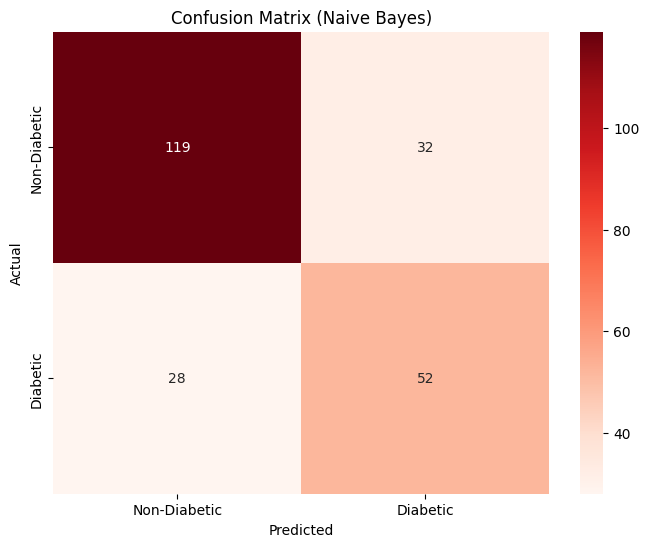

Naive Bayes Modeli Doğruluk Oranı: 0.74
Performans Metrikleri:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231

sensitivity: 0.65
specificity: 0.79


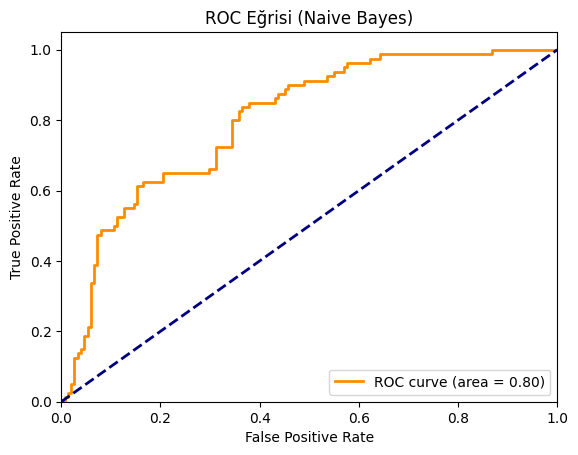

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Veriyi %70 eğitim ve %30 test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturma ve eğitme
clf = GaussianNB()
clf.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Konfüzyon matrisi hesapla
conf_matrix_naive = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_naive, annot=True, fmt='d', cmap='Reds', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

# sensitivity ve specificity Hesaplama
tp = conf_matrix_naive[1, 1]  # True Positives
tn = conf_matrix_naive[0, 0]  # True Negatives
fp = conf_matrix_naive[0, 1]  # False Positives
fn = conf_matrix_naive[1, 0]  # False Negatives

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Modelin performansını değerlendir
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Naive Bayes Modeli Doğruluk Oranı: {accuracy:.2f}')
print('Performans Metrikleri:')
print(report)
print(f'sensitivity: {sensitivity:.2f}')
print(f'specificity: {specificity:.2f}')


# ROC Eğrisi ve AUC Hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ROC Eğrisini Çizme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

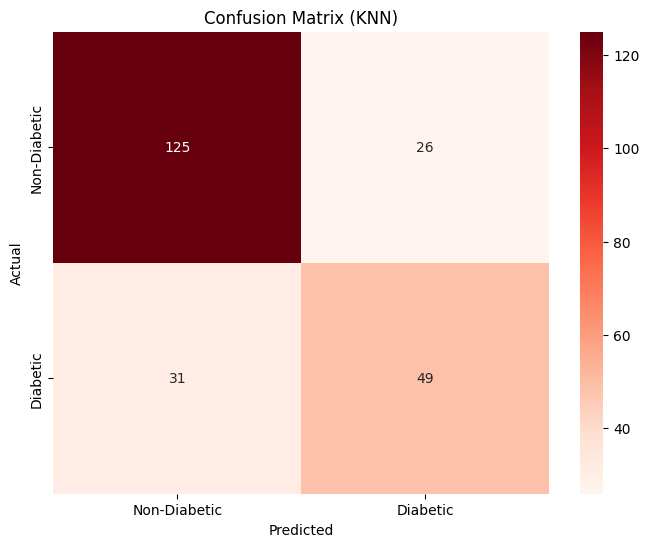

KNN Modeli Doğruluk Oranı: 0.75
Performans Metrikleri:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

sensitivity: 0.61
specificity: 0.83


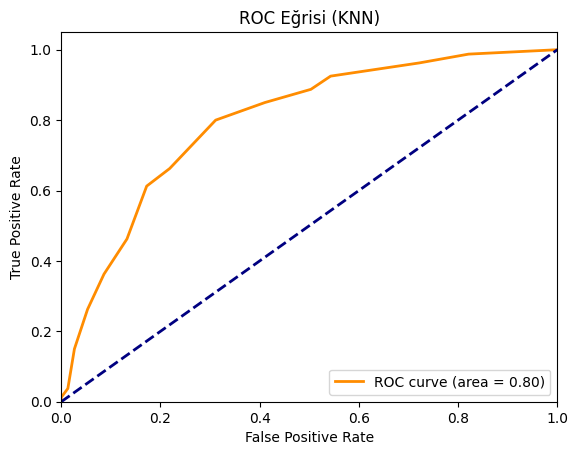

In [ ]:
# K-en Yakın Komşuluk (KNN) sınıflandırıcısını oluşturma ve eğitme
knn = KNeighborsClassifier(n_neighbors=17)  # Örnek K değeri
knn.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Konfüzyon matrisi hesaplama
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Konfüzyon matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Reds', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()

# sensitivity ve specificity hesaplama
tp_knn = conf_matrix_knn[1, 1]  # True Positives
tn_knn = conf_matrix_knn[0, 0]  # True Negatives
fp_knn = conf_matrix_knn[0, 1]  # False Positives
fn_knn = conf_matrix_knn[1, 0]  # False Negatives

sensitivity_knn = tp_knn / (tp_knn + fn_knn)
specificity_knn = tn_knn / (tn_knn + fp_knn)

# Modelin performansını değerlendirme
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f'KNN Modeli Doğruluk Oranı: {accuracy_knn:.2f}')
print('Performans Metrikleri:')
print(report_knn)
print(f'sensitivity: {sensitivity_knn:.2f}')
print(f'specificity: {specificity_knn:.2f}')

# ROC Eğrisi ve AUC Hesaplama
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# ROC Eğrisini Çizme
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (KNN)')
plt.legend(loc="lower right")
plt.show()

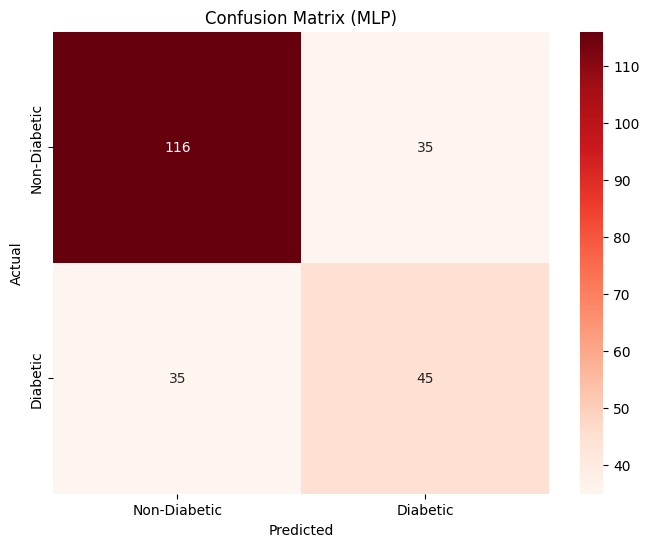

MLP Modeli Doğruluk Oranı: 0.70
MLP Performans Metrikleri:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       151
           1       0.56      0.56      0.56        80

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231

Sensitivity (MLP): 0.56
Specificity (MLP): 0.77


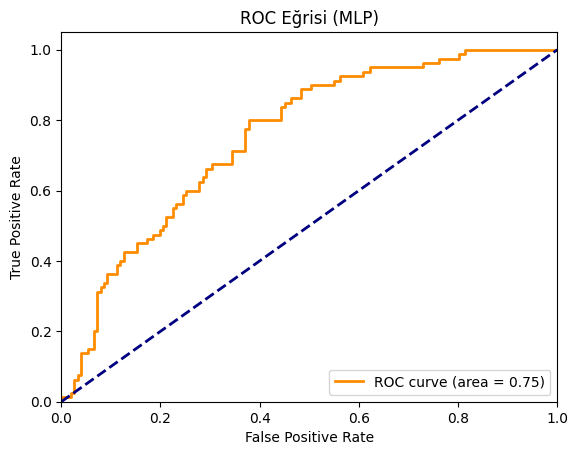

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


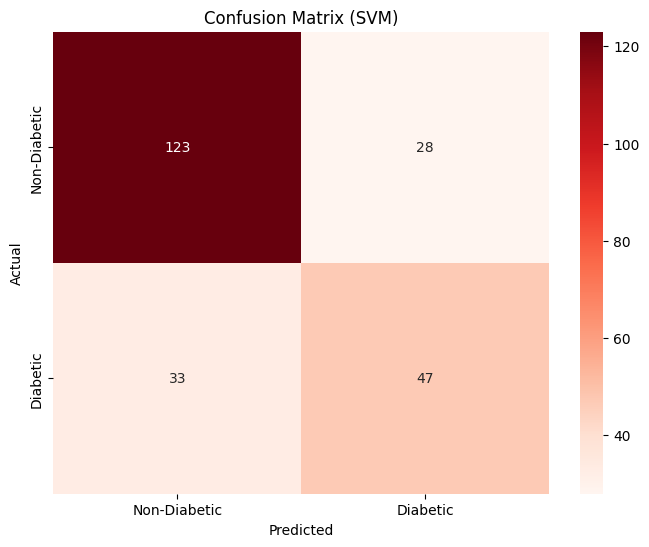

SVM Modeli Doğruluk Oranı: 0.74
SVM Performans Metrikleri:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231

Sensitivity (SVM): 0.59
Specificity (SVM): 0.81


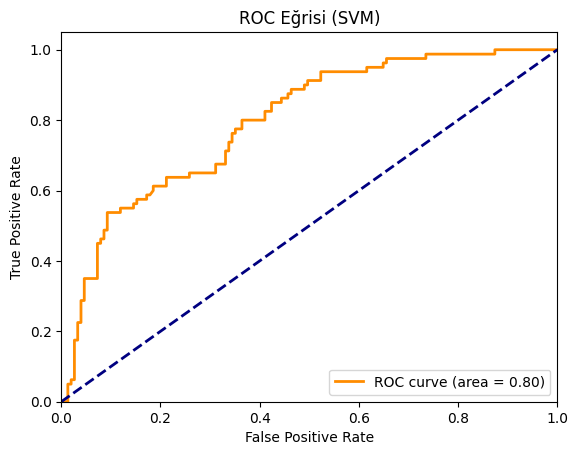

In [140]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# MLP modelinin performansını değerlendirme
y_pred_mlp = mlp.predict(X_test)
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]

conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Reds', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MLP)')
plt.show()

# Sensitivity ve Specificity Hesaplama (MLP)
tp_mlp = conf_matrix_mlp[1, 1]  # True Positives
tn_mlp = conf_matrix_mlp[0, 0]  # True Negatives
fp_mlp = conf_matrix_mlp[0, 1]  # False Positives
fn_mlp = conf_matrix_mlp[1, 0]  # False Negatives

sensitivity_mlp = tp_mlp / (tp_mlp + fn_mlp)
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)

# MLP Performans Metrikleri
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp)

print(f'MLP Modeli Doğruluk Oranı: {accuracy_mlp:.2f}')
print('MLP Performans Metrikleri:')
print(report_mlp)
print(f'Sensitivity (MLP): {sensitivity_mlp:.2f}')
print(f'Specificity (MLP): {specificity_mlp:.2f}')

# ROC Eğrisi ve AUC Hesaplama (MLP)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# ROC Eğrisini Çizme (MLP)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (MLP)')
plt.legend(loc="lower right")
plt.show()
print("\n")

# SVM sınıflandırıcısını oluşturma ve eğitme
svm = SVC(kernel='linear', random_state=42, probability=True)
svm.fit(X_train, y_train)

# MLP sınıflandırıcısını oluşturma ve eğitme
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train, y_train)

# SVM modelinin performansını değerlendirme
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Sensitivity ve Specificity Hesaplama (SVM)
tp_svm = conf_matrix_svm[1, 1]  # True Positives
tn_svm = conf_matrix_svm[0, 0]  # True Negatives
fp_svm = conf_matrix_svm[0, 1]  # False Positives
fn_svm = conf_matrix_svm[1, 0]  # False Negatives

sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)

# SVM Performans Metrikleri
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Modeli Doğruluk Oranı: {accuracy_svm:.2f}')
print('SVM Performans Metrikleri:')
print(report_svm)
print(f'Sensitivity (SVM): {sensitivity_svm:.2f}')
print(f'Specificity (SVM): {specificity_svm:.2f}')

# ROC Eğrisi ve AUC Hesaplama (SVM)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# ROC Eğrisini Çizme (SVM)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (SVM)')
plt.legend(loc="lower right")
plt.show()